In [11]:
# Importing necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading the datasets
customers_df = pd.read_csv('Customers.csv')
products_df = pd.read_csv('Products.csv')
transactions_df = pd.read_csv('Transactions.csv')

# Converting date columns to datetime
customers_df['SignupDate'] = pd.to_datetime(customers_df['SignupDate'])
transactions_df['TransactionDate'] = pd.to_datetime(transactions_df['TransactionDate'])

# Displaying basic information for each dataset
customers_info = customers_df.info()
products_info = products_df.info()
transactions_info = transactions_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 4 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   CustomerID    200 non-null    object        
 1   CustomerName  200 non-null    object        
 2   Region        200 non-null    object        
 3   SignupDate    200 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(3)
memory usage: 6.4+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   ProductID    100 non-null    object 
 1   ProductName  100 non-null    object 
 2   Category     100 non-null    object 
 3   Price        100 non-null    float64
dtypes: float64(1), object(3)
memory usage: 3.3+ KB
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 7 columns):
 #   Column           Non

In [12]:
# 1. Analyzing customer regions
customer_region_counts = customers_df['Region'].value_counts()
print("Customer Distribution by Region:\n", customer_region_counts)

Customer Distribution by Region:
 Region
South America    59
Europe           50
North America    46
Asia             45
Name: count, dtype: int64


In [13]:
# 2. Product categories
product_category_counts = products_df['Category'].value_counts()
print("Product Categories:\n", product_category_counts)

Product Categories:
 Category
Books          26
Electronics    26
Clothing       25
Home Decor     23
Name: count, dtype: int64


In [14]:
# 3. Top-selling products
top_selling_products = (
    transactions_df.groupby('ProductID')['Quantity']
    .sum()
    .sort_values(ascending=False)
    .head(5)
)
print("Top-Selling Products:\n", top_selling_products)

Top-Selling Products:
 ProductID
P059    46
P054    46
P029    45
P079    43
P061    43
Name: Quantity, dtype: int64


In [15]:
# 4. Total sales per region
transactions_with_region = transactions_df.merge(customers_df[['CustomerID', 'Region']], on='CustomerID')
region_sales = (
    transactions_with_region.groupby('Region')['TotalValue']
    .sum()
    .sort_values(ascending=False)
)
print("Total Sales per Region:\n", region_sales)

Total Sales per Region:
 Region
South America    219352.56
Europe           166254.63
North America    152313.40
Asia             152074.97
Name: TotalValue, dtype: float64


In [16]:
# 5. Average customer purchase frequency
customer_purchase_frequency = transactions_df['CustomerID'].value_counts().mean()
print("Average Customer Purchase Frequency:", customer_purchase_frequency)

Average Customer Purchase Frequency: 5.025125628140704


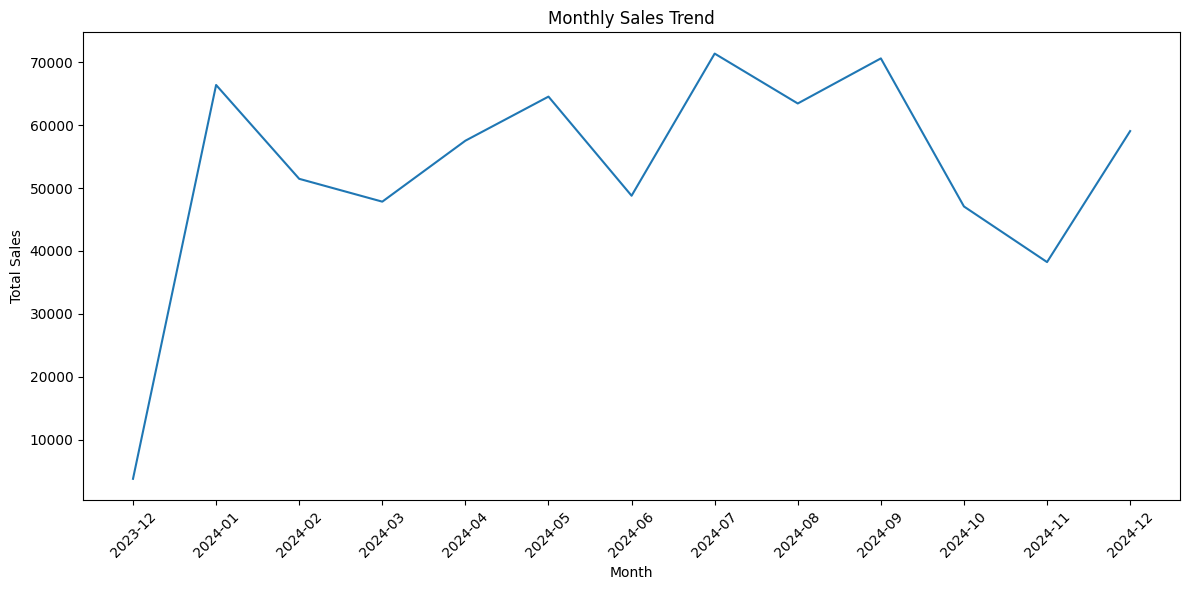

Index(['ProductID', 'ProductName', 'Category', 'Price_x', 'TransactionID',
       'CustomerID', 'TransactionDate', 'Quantity', 'TotalValue', 'Price_y',
       'Month'],
      dtype='object')


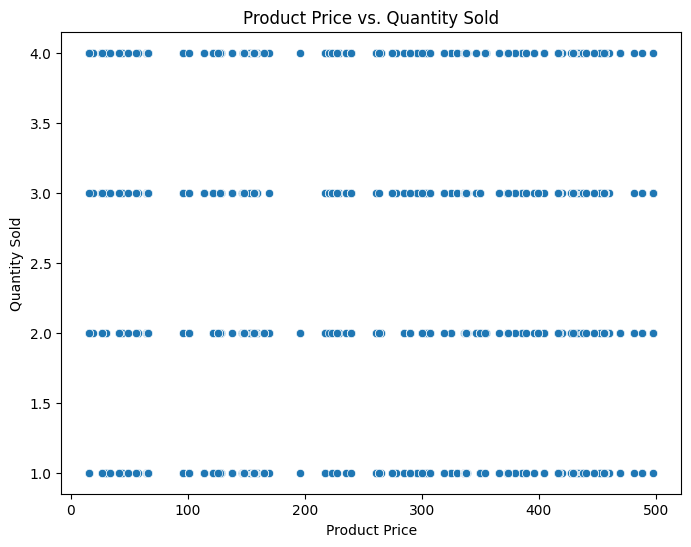

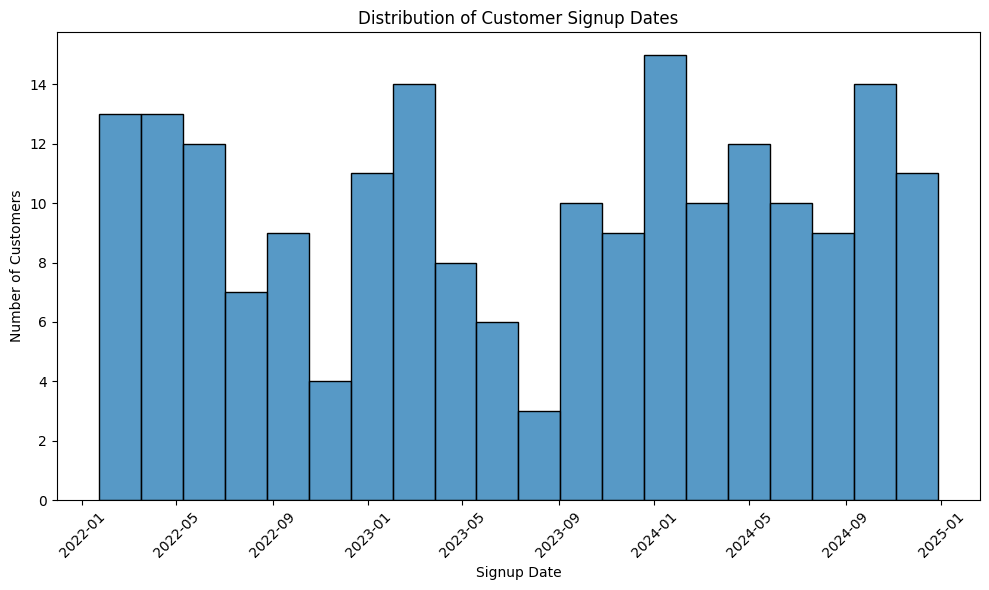

Average Transaction Value per Region:
 Region
Asia             697.591606
Europe           710.489872
North America    624.235246
South America    721.554474
Name: TotalValue, dtype: float64
Correlation between TotalValue and Quantity: 0.6099722271030487


In [17]:
# 6.  Customer spending habits over time
# Create a new column 'Month' for analysis
transactions_df['Month'] = transactions_df['TransactionDate'].dt.to_period('M')
monthly_sales = transactions_df.groupby('Month')['TotalValue'].sum()

plt.figure(figsize=(12, 6))
plt.plot(monthly_sales.index.astype(str), monthly_sales.values)
plt.xlabel('Month')
plt.ylabel('Total Sales')
plt.title('Monthly Sales Trend')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 7.  Relationship between product price and quantity sold
product_sales = products_df.merge(transactions_df, on='ProductID')
print(product_sales.columns)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Price_x', y='Quantity', data=product_sales)
plt.xlabel('Product Price')
plt.ylabel('Quantity Sold')
plt.title('Product Price vs. Quantity Sold')
plt.show()

# 8. Analyze the distribution of customer signup dates
plt.figure(figsize=(10, 6))
sns.histplot(customers_df['SignupDate'], bins=20)
plt.xlabel('Signup Date')
plt.ylabel('Number of Customers')
plt.title('Distribution of Customer Signup Dates')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# 9. Average transaction value per region
average_transaction_value = transactions_with_region.groupby('Region')['TotalValue'].mean()
print("Average Transaction Value per Region:\n", average_transaction_value)

# 10. Explore the correlation between different features
# Example: correlation between total value and quantity
correlation = transactions_df['TotalValue'].corr(transactions_df['Quantity'])
print(f"Correlation between TotalValue and Quantity: {correlation}")



